# India News Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_22344\1317460716.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loading the Dataset

In [2]:
df = pd.read_csv('india-news-headlines.csv', dtype={'publish_date': object})

In [3]:
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [4]:
df['publish_month'] = df.publish_date.str[:6]
df['publish_year'] = df.publish_date.str[:4]
df['publish_month_only'] = df.publish_date.str[4:6]
df['publish_day_only'] = df.publish_date.str[6:8]

df['dt_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['dt_month'] = pd.to_datetime(df['publish_month'], format='%Y%m')

In [5]:
df.head()

,publish_date,headline_category,headline_text,publish_month,publish_year,publish_month_only,publish_day_only,dt_date,dt_month
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,200101,2001,01,02,2001-01-02,2001-01-01
1,20010102,unknown,Fissures in Hurriyat over Pak visit,200101,2001,01,02,2001-01-02,2001-01-01
2,20010102,unknown,America's unwanted heading for India?,200101,2001,01,02,2001-01-02,2001-01-01
3,20010102,unknown,For bigwigs; it is destination Goa,200101,2001,01,02,2001-01-02,2001-01-01
4,20010102,unknown,Extra buses to clear tourist traffic,200101,2001,01,02,2001-01-02,2001-01-01


In [6]:
df.columns

Index(['publish_date', 'headline_category', 'headline_text', 'publish_month',
       'publish_year', 'publish_month_only', 'publish_day_only', 'dt_date',
       'dt_month'],
      dtype='object')

In [7]:
df.shape

(3876557, 9)

In [8]:
df.describe()

,dt_date,dt_month
count,3876557,3876557
mean,2014-03-01 10:55:27.614066176,2014-02-14 17:07:22.869173760
min,2001-01-02 00:00:00,2001-01-01 00:00:00
25%,2010-08-27 00:00:00,2010-08-01 00:00:00
50%,2014-08-08 00:00:00,2014-08-01 00:00:00
75%,2018-05-28 00:00:00,2018-05-01 00:00:00
max,2023-06-30 00:00:00,2023-06-01 00:00:00


____
# WordClouds

In [9]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

All headlines used for 2023

In [10]:
df['publish_year'] = pd.to_numeric(df['publish_year'], errors='coerce')
df_2023 = df[df['publish_year'] == 2023]

In [11]:
all_headlines = ' '.join(df_2023['headline_text'].dropna())

In [12]:
words = word_tokenize(all_headlines)
words

['happy',
 'new',
 'year',
 '2023',
 'memes',
 'messages',
 'wishes',
 '10',
 'funny',
 'memes',
 'and',
 'messages',
 'about',
 'new',
 'year',
 'that',
 'will',
 'make',
 'you',
 'laugh',
 'out',
 'loud',
 'happy',
 'new',
 'year',
 'quotes',
 'wishes',
 'and',
 'messages',
 'to',
 'share',
 'with',
 'friends',
 'family',
 'and',
 'colleagues',
 'Today',
 "'s",
 'Panchang',
 ';',
 '1',
 'January',
 '2023',
 ':',
 'Auspicious',
 'Times',
 'and',
 'Important',
 'Events',
 'Today',
 "'s",
 'Panchang',
 ';',
 '1',
 'January',
 '2023',
 ':',
 'Auspicious',
 'Times',
 'and',
 'Important',
 'Events',
 'Aries',
 'Today',
 "'s",
 'Rashifal',
 '-',
 '1',
 'January',
 '2023',
 ':',
 'Your',
 'partner',
 'may',
 'be',
 'in',
 'a',
 'mood',
 'to',
 'give',
 'you',
 'some',
 'nice',
 'surprises',
 'Taurus',
 'Today',
 "'s",
 'Horoscope',
 'Prediction',
 '-',
 '1',
 'January',
 '2023',
 ':',
 'You',
 'may',
 'feel',
 'like',
 'making',
 'up',
 'with',
 'your',
 'partner',
 'for',
 'the',
 'lost',
 

In [13]:
stop_words = set(stopwords.words('english'))

filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

filtered_words

['happy',
 'new',
 'year',
 'memes',
 'messages',
 'wishes',
 'funny',
 'memes',
 'messages',
 'new',
 'year',
 'make',
 'laugh',
 'loud',
 'happy',
 'new',
 'year',
 'quotes',
 'wishes',
 'messages',
 'share',
 'friends',
 'family',
 'colleagues',
 'today',
 'panchang',
 'january',
 'auspicious',
 'times',
 'important',
 'events',
 'today',
 'panchang',
 'january',
 'auspicious',
 'times',
 'important',
 'events',
 'aries',
 'today',
 'rashifal',
 'january',
 'partner',
 'may',
 'mood',
 'give',
 'nice',
 'surprises',
 'taurus',
 'today',
 'horoscope',
 'prediction',
 'january',
 'may',
 'feel',
 'like',
 'making',
 'partner',
 'lost',
 'time',
 'cancer',
 'horoscope',
 'predictions',
 'today',
 'january',
 'time',
 'unleash',
 'real',
 'love',
 'partner',
 'hidden',
 'inside',
 'leo',
 'detailed',
 'horoscope',
 'january',
 'partner',
 'create',
 'big',
 'scene',
 'issue',
 'small',
 'situation',
 'virgo',
 'daily',
 'horoscope',
 'january',
 'good',
 'day',
 'may',
 'feel',
 'energe

In [14]:
word_frequncy = pd.Series(filtered_words).value_counts()
word_frequncy

rs           3762
delhi        3641
man          3199
held         3122
cm           2728
             ... 
aatithyam       1
barharwa        1
maksi           1
chitu           1
parrikar        1
Name: count, Length: 37295, dtype: int64

In [15]:
wordCloud = WordCloud(
    width=1000,
    height=600,
    background_color='white'
).generate_from_frequencies(word_frequncy)

(-0.5, 999.5, 599.5, -0.5)

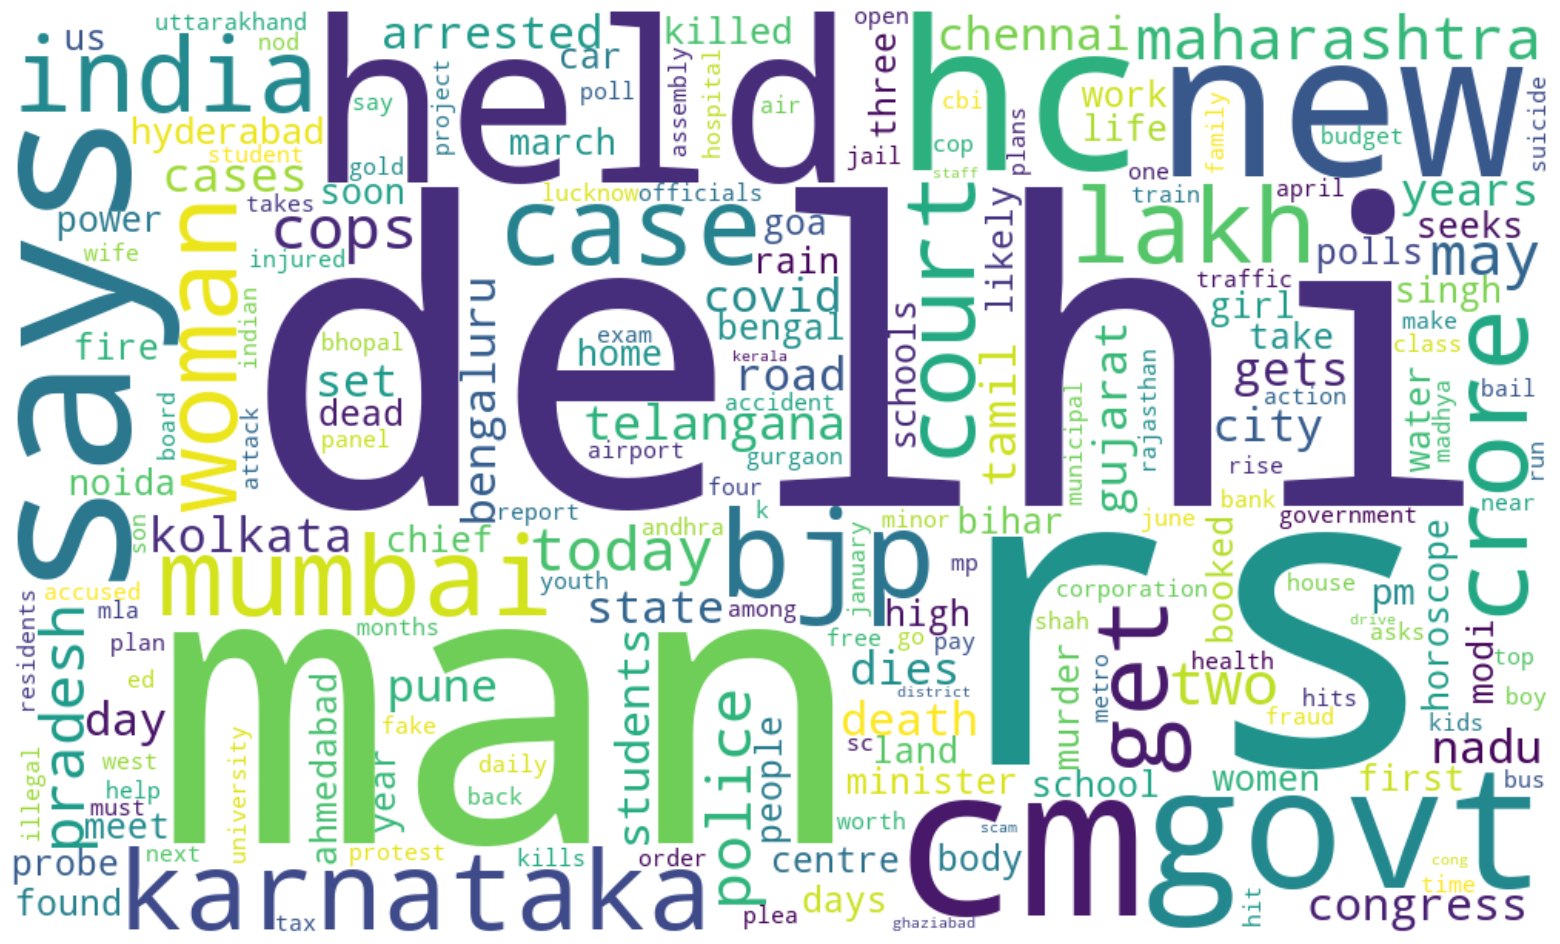

In [16]:
plt.figure(figsize=(24, 12))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

## Lets create a wordcloud for bigrams

In [17]:
from nltk import bigrams

bigrams_list = list(bigrams(filtered_words))

In [18]:
bigrams_strings = [' '.join(bigram) for bigram in bigrams_list]
bigram_freq = pd.Series(bigrams_strings).value_counts()
bigram_freq

rs crore            1529
tamil nadu          1300
rs lakh             1245
madhya pradesh       566
west bengal          509
                    ... 
keep several           1
active keep            1
viruses active         1
cheating viruses       1
run panaji             1
Name: count, Length: 434017, dtype: int64

In [19]:
bigram_wordCloud = WordCloud(
    width=1000,
    height=600,
    background_color='white'
).generate_from_frequencies(bigram_freq)

(-0.5, 999.5, 599.5, -0.5)

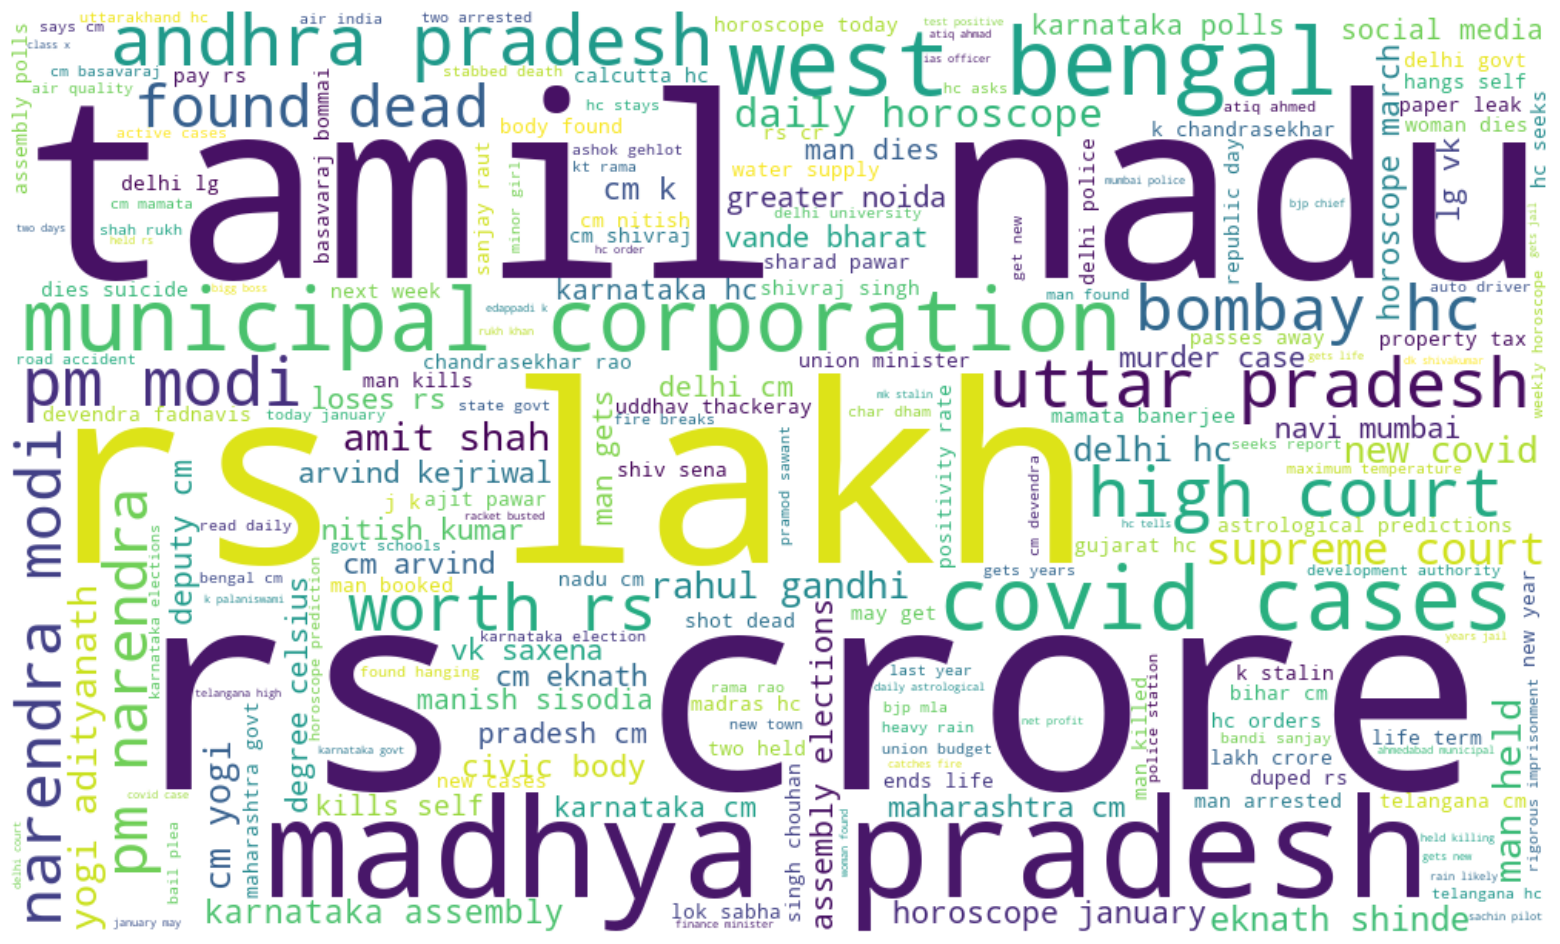

In [20]:
plt.figure(figsize=(24, 12))
plt.imshow(bigram_wordCloud, interpolation='bilinear')
plt.axis('off')

## Similarly for trigrams

In [21]:
from nltk import ngrams

tigrams_list = list(ngrams(filtered_words, 3))

trigram_string = [' '.join(trigram) for trigram in tigrams_list]

trigrams_freq = pd.Series(trigram_string).value_counts()
trigrams_freq

pm narendra modi            301
cm yogi adityanath          219
new covid cases             191
worth rs crore              176
cm eknath shinde            165
                           ... 
make fireproof delhi          1
equipment make fireproof      1
new equipment make            1
cases new equipment           1
trial run panaji              1
Name: count, Length: 578144, dtype: int64

In [22]:
trigram_wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white'
).generate_from_frequencies(trigrams_freq)

(-0.5, 999.5, 599.5, -0.5)

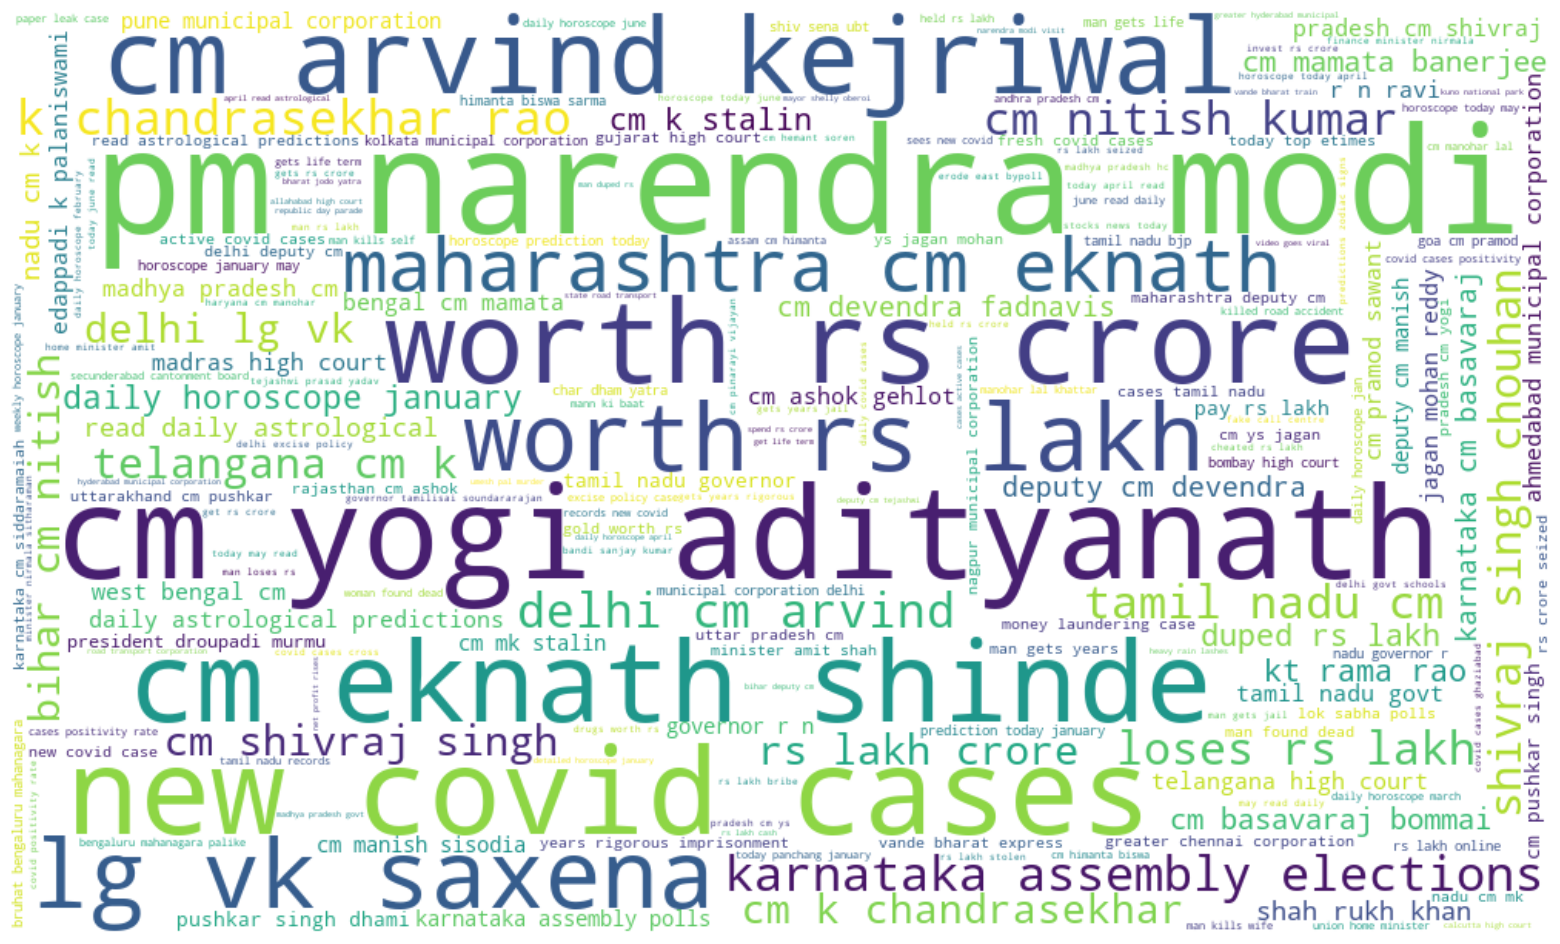

In [23]:
plt.figure(figsize=(24, 12))
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')

_____
# Sentiment Analysis

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [25]:
sia = SentimentIntensityAnalyzer()

Example

In [26]:
print(sia.polarity_scores(df['headline_text'][10]))
print(df['headline_text'][10])

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
Parivar dismisses PM's warning


____

In [27]:
df_2023.loc[:, 'compound'] = df_2023['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_22344\2453364581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.loc[:, 'compound'] = df_2023['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [28]:
df_2023['sentiment'] = df_2023['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_22344\3230740016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['sentiment'] = df_2023['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')


In [29]:
df_2023[['headline_text', 'compound', 'sentiment']]

,headline_text,compound,sentiment
3786481,happy new year 2023 memes messages wishes 10 f...,0.8957,positive
3786482,happy new year quotes wishes and messages to s...,0.8625,positive
3786483,Today's Panchang; 1 January 2023: Auspicious T...,0.2023,positive
3786484,Today's Panchang; 1 January 2023: Auspicious T...,0.2023,positive
3786485,Aries Today's Rashifal - 1 January 2023: Your ...,0.5719,positive
...,...,...,...
3876552,10 PIs move HC over thwarted seniority,-0.0258,negative
3876553,Govt notifies award in memory of Parrikar for ...,0.5423,positive
3876554,After youth's death; PWD installs crash barrie...,-0.7650,negative
3876555,Authorities not acting against CRZ violations,-0.5267,negative


let plot this down

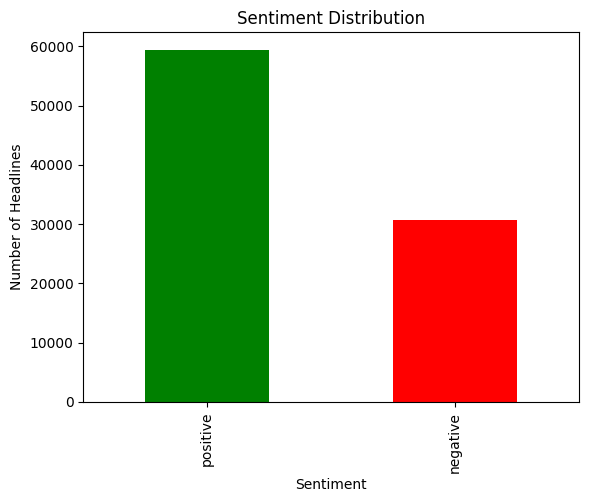

In [30]:
sentiment_dist = df_2023['sentiment'].value_counts()
sentiment_dist.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

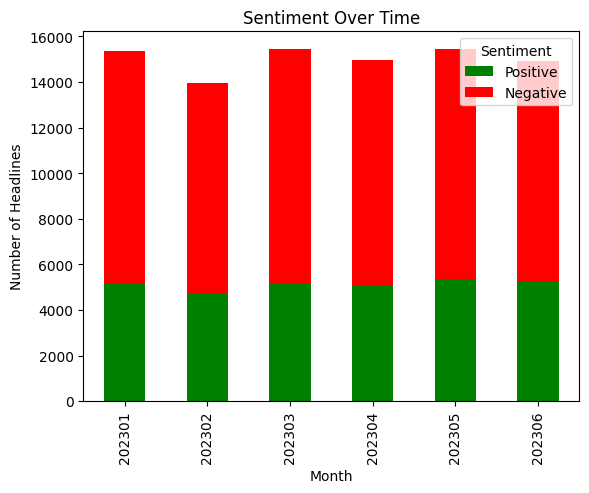

In [31]:
monthly_sentiment = df_2023.groupby('publish_month')['sentiment'].value_counts().unstack().fillna(0)
monthly_sentiment.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Headlines')
plt.legend(title='Sentiment', loc='upper right', labels=['Positive', 'Negative'])
plt.show()

lets seperate positive and negative headlines

In [32]:
top_positive_headlines = df_2023[df_2023['sentiment'] == 'positive'].nlargest(5, 'compound')[['headline_text', 'compound']]
#nsmallest because in negative the value decreases -0.9 < 0.015
top_negative_headlines = df_2023[df_2023['sentiment'] == 'negative'].nsmallest(5, 'compound')[['headline_text', 'compound']]

print("Top Positive Headlines:")
print(top_positive_headlines)
print("\nTop Negative Headlines:")
print(top_negative_headlines)

Top Positive Headlines:
                                             headline_text  compound
3807307  Happy Hug Day 2023: Best Messages; Quotes; Wis...    0.9509
3808308  happy valentines day 2023 quotes sayings messa...    0.9468
3807804  Happy Kiss Day 2023: Best Messages; Quotes; Wi...    0.9460
3819280  happy holi 2023 quotes wishes messages status ...    0.9451
3845198  Winning players' respect more important than S...    0.9419

Top Negative Headlines:
                                             headline_text  compound
3863142  Odisha three-train accident: 288 dead in India...   -0.9666
3815400  MLA Umesh Pal's murder: UP cops shoot dead acc...   -0.9584
3823064  Ghaziabad: Dad dead; mom abandoned her; 4-year...   -0.9545
3859318  Realtor brutally murdered at his residence in ...   -0.9545
3812761   22-year-old gets death penalty for rape & murder   -0.9538
